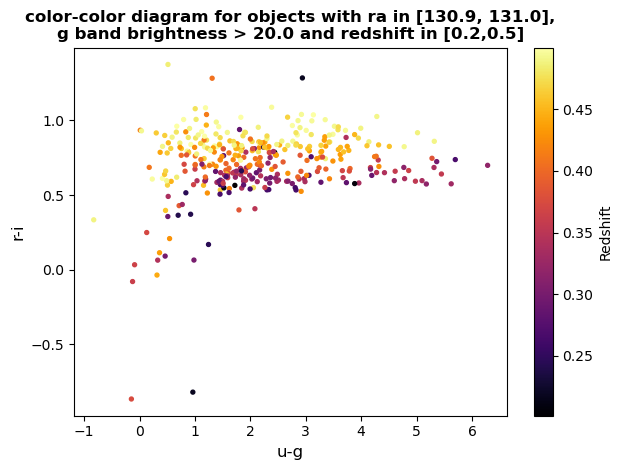

In [3]:
from astroquery.sdss import SDSS
import matplotlib.pyplot as plt
#import matplotlib.colors as mpc

#get database
#-----------------------------------------------------------------------------------------------------------------------------
#sdss = SDSS()

q1 = "SELECT p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, s.specobjid, s.class, s.z as redshift "
q2 = "FROM PhotoObj AS p JOIN SpecObj AS s ON p.objid = s.bestobjid "
q3 = "WHERE p.ra BETWEEN 130.9 AND 131.0 AND p.g > 20.0 AND s.z BETWEEN 0.2 AND 0.5 "

query = q1 + q2 + q3

results = SDSS.query_sql(query, data_release = 18)
#-----------------------------------------------------------------------------------------------------------------------------

#plotting
#-----------------------------------------------------------------------------------------------------------------------------
redshift = results['redshift']
X = results['u']-results['g']
Y = results['r']-results['i']

plt.title('color-color diagram for objects with ra in [130.9, 131.0],\ng band brightness > 20.0 and redshift in [0.2,0.5]', fontweight = 'bold')
plt.xlabel('u-g', size = 12)
plt.ylabel('r-i', size = 12)
# colormap = plt.cm.inferno 
# # Normalize using the min and max values in array
# normalize = plt.Normalize(vmin=min(redshift), vmax=max(redshift))
# # scatter plot with the parameters defined above
# plt.scatter(X, Y, c=redshift, cmap=colormap, marker='.', s = 15)
plt.scatter(X, Y, s = 8, c = redshift, cmap = 'inferno')
plt.colorbar(label="Redshift")
plt.tight_layout()
plt.savefig('figures/plot.png')
#plt.savefig('figures/plot.pdf')